# Segmentação de parafusos com técnicas clássicas de processamento de imagem

Ao analisar o histograma das imagens, pode-se observar que os parafusos com fundo preto possuem maior ocorrência de pixels menores que 100. Por outro lado, as imagens com fundo branco ou claro apresentam maior ocorrência de pixels de intensidade 100.

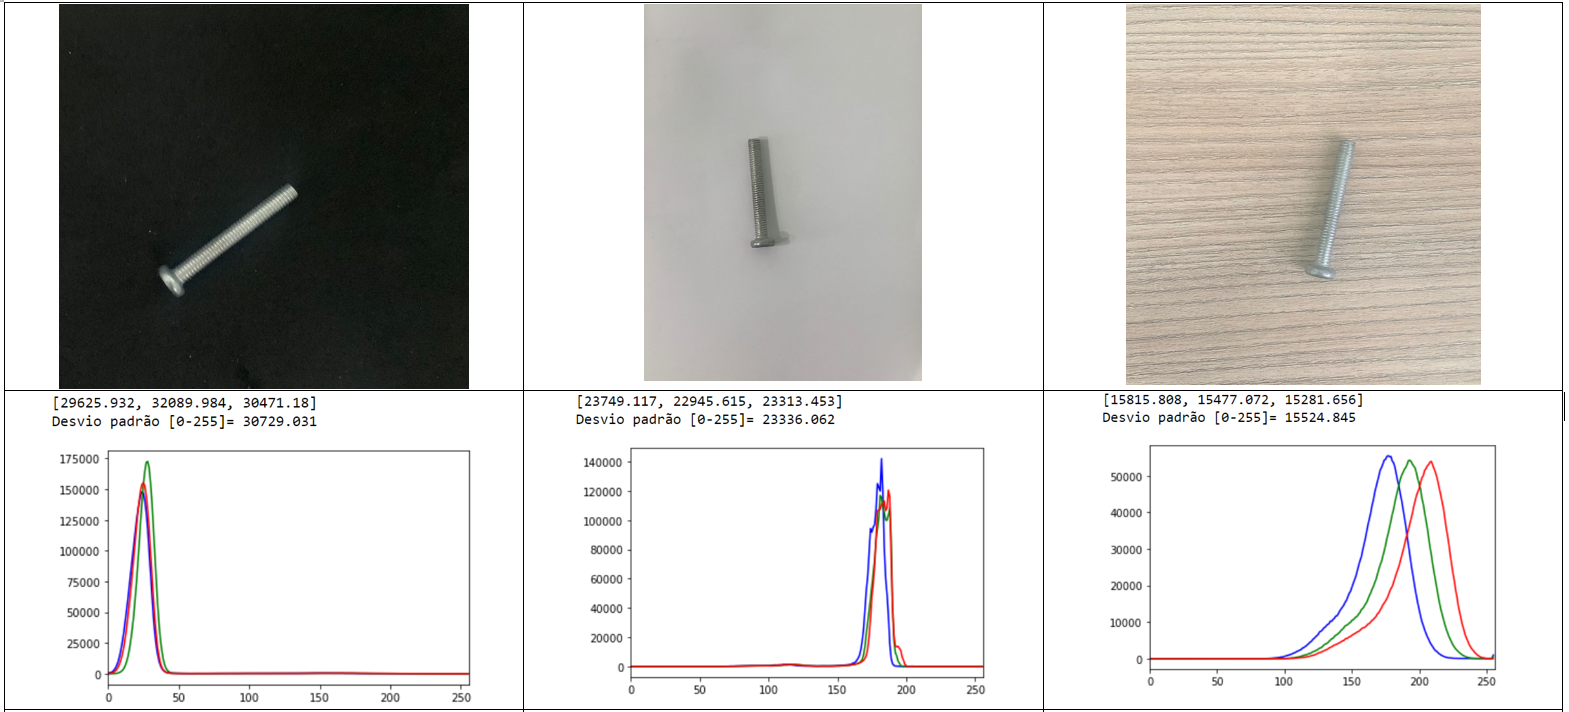

Analisando apenas o desvio padrão dos pixels de intensidade 0-100, consegue-se uma clara diferenciação dos tipos de imagens para aplicação dos respectivos limites.

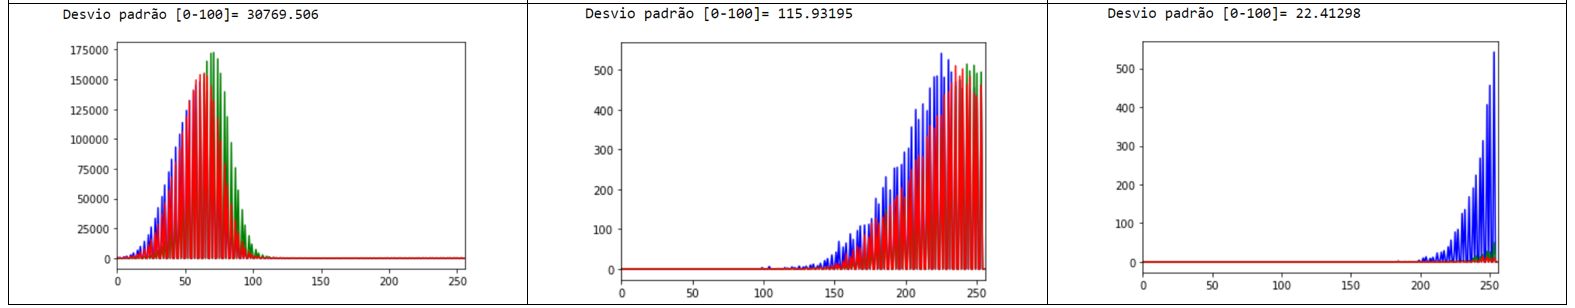

In [1]:
# Importar bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

15524.845
22.41298


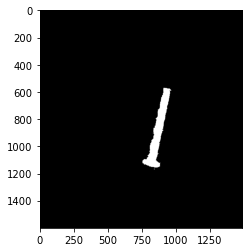

In [2]:
#Letura da imagem 
image= cv2.imread('Parafuso 3.jpeg') 

color = ('b','g','r')
lis_std_histo_Geral=[]
lis_std_histo=[]

for i, c in enumerate(color):
    #Análise da dispersão dos dados da imagem através do histograma
    histGeral = cv2.calcHist([image], [i], None, [256], [0, 256]) 
    histEspe = cv2.calcHist([image], [i], None, [256], [0, 100])  
    lis_std_histo_Geral.append(np.std(histGeral))
    lis_std_histo.append(np.std(histEspe))
    
print(np.mean(lis_std_histo_Geral))
print(np.mean(lis_std_histo))
    
if np.mean(lis_std_histo) > 30000:
    # Limites da segmentação no formato HSV para imagem com fundo preto
    lower = np.array([0,0,74])
    upper = np.array([179,255,255])
elif np.mean(lis_std_histo) > 100:
    # Limites da segmentação no formato HSV para imagem fondo branco
    lower = np.array([0,0,0])
    upper = np.array([179,255,145])
else:
    # Limites da segmentação no formato HSV para imagem com fundo variavel 
    lower = np.array([34,0,0])
    upper = np.array([179,255,255])
    
# Converter para formato HSV e limite de cor
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv = cv2.GaussianBlur(hsv, (3,3) ,0) 
mask = cv2.inRange(hsv, lower, upper)
# Uma operação de morfologia (close) é realizada para melhorar a segmentação
kernel = np.ones((3,3),np.uint8)
mask_with_open=cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

plt.imshow(mask_with_open,'gray')
plt.show()

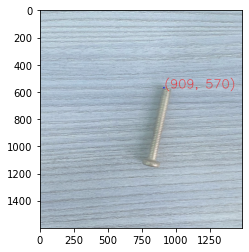

In [3]:
# Encontrar os contornos da imagem
cnts = cv2.findContours(mask_with_open.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# argmin e argmax pra encontrar pontos extremos
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# Coordenada de texto na imagem
org = (extTop[0]+3,extTop[1]+3)
# Tipo de fonte
font = cv2.FONT_HERSHEY_SIMPLEX
# Fator de escala da fonte
fontScale = 3
# Cor do texto
color = (255, 0, 0)
# Espessura da linha
thickness = 2

# Grafica do ponto mais alto
img_point_coordinates = cv2.circle(image, extTop, radius=5, color=(0, 0, 255), thickness=-1)
img_point_coordinates = cv2.putText(image, str(extTop), org, font,fontScale, color, thickness, cv2.LINE_AA)
plt.imshow(img_point_coordinates,'gray')